# Model comparisons for Figure 6

Ryan suggested a frequentist model rejection metric [see section 5.3 of Siyi et al. 2021](https://ui.adsabs.harvard.edu/abs/2021AJ....162..296X/abstract) 

In [1]:
# import for the pandexo environment

import warnings
warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi 
import pandexo.engine.justplotit as jpi
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 140
import astropy
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, ScalarFormatter, NullFormatter
from scipy.ndimage import gaussian_filter1d as gauss_conv
import pickle as pk
import numpy as np
import pandas as pd
import scipy.constants as sc
from scipy.special import gammainc
from scipy.stats import norm
from spectres import spectres 
import copy
import pysynphot as psyn
from os import listdir
import matplotlib

You convert the best-fitting $\chi^2$ into the equivalent p-value (using the incomplete gamma function) derive how many standard deviations each model is “rejected” by the observations. The function below evaluates that

In [2]:
def frequentist_model_rejection(wav_model, model, wav_data, data, err_data):
    
    # calculate chi-sq
    # bin total spectrum to data array
    model_binned = spectres(wav_data, wav_model, model)
    chisq = np.sum(((model_binned - data)**2)/(err_data)**2)

    # calculate the p-value using the incomplete gamma function; it needs the chi^2 you just computed
    N_data = data.size
    pval = 1 - gammainc(0.5*(N_data-1), 0.5*chisq)

    # calculate the sigma-rejection value using the p-value you just computed and the inverse of the cumulative density function (aka the percent point function);
    # recall that in a Gaussian distribution there are two tails (one at each end) so you need to divide the p-value by 2
    # this will give you the sigma-confidence with which you can reject the model
    sigma_rejection = norm.ppf(1.-(pval/2))

    # if you're value of pval/2 is too small you can run up against some floating point precision in python and get an unwanted inf; I figured out a way around this but it's a little ugly: 
  #  sigma_rejection = st.norm.isf((st.chi2.sf(chisq, degrees_of_freedom))/2.)
   
    return sigma_rejection

## For SE20

### R=20 binned points for N_eclipses = 5

In [3]:
# load data

R = 20

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'SE20_noiseless_data_R' + str(R) +'.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

0.30555213458409763
3.519276110639917e-12
0.323832702769526


In [4]:
# load data

R = 20

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'TO01_noiseless_data_R' + str(R) +'.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

0.31857629078360145
0.38861831263400337
1.781066511789931e-14


The 'wrong' models are only weakly rejected at $\sim 0.3\sigma$

### R=30 binned points for N_eclipses = 5

In [5]:
# load data

R = 30

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'SE20_noiseless_data_R' + str(R) +'.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

0.0997968333413016
0.0
0.15746424477260343


In [6]:
# load data

R = 30

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'TO01_noiseless_data_R' + str(R) +'.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

0.10175118140434308
0.15676780289540837
2.3933081252177197e-14


Its even weaker for R=30

### Let us try for R=20,30 and n_eclipses = 10

We will first need to generate the SE20 and TO01 noiseless data points for 10 eclipses

In [7]:
# Load the default simulation from pandexo for 5 transits

file_prefix = 'simulation_outputs/paper/figure_6/figure_6c/'
file_list = ['LC10', 'SE20','TO01']
num_transits = 10

wav_data_default_list, data_default_list, err_data_default_list = [],[],[]

for file in file_list:
    out = pk.load(open(file_prefix + file + '.p','rb'))
    wav_data_default, data_default, err_data_default = jpi.jwst_1d_spec(out, num_tran=num_transits, model=True, plot=False)
    wav_data_default, data_default, err_data_default = wav_data_default[0], data_default[0], err_data_default[0]
    wav_data_default_list.append(wav_data_default)
    data_default_list.append(data_default)
    err_data_default_list.append(err_data_default)

# Use spectres to bin the original model to the pandexo simulation's wavelength axis.

wav_data_mod_list, data_mod_list = [],[]
wav_model_list, model_list = [],[]

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'

for i,file in enumerate(file_list):
    data  = np.loadtxt(file_prefix + file + '_model_R200.txt')
    wav_model, model = data[:,0], data[:,1]

    wav_data_mod = wav_data_default_list[i]
    data_mod = spectres(wav_data_mod, wav_model, model)

    wav_model_list.append(wav_model)
    model_list.append(model)
    wav_data_mod_list.append(wav_data_mod)
    data_mod_list.append(data_mod)

# create the new wavelength array between 8 and 11 microns and R=10,20 and 30


R_list = [10,20,30]

data_mod_2_se20_list, wav_data_mod_2_se20_list, err_data_mod_2_se20_list = [],[],[]
data_mod_2_to01_list, wav_data_mod_2_to01_list, err_data_mod_2_to01_list = [],[],[]

for R in R_list:
   
    # SE20

    wav_data_mod_2 = np.array([10])

    while wav_data_mod_2.max() < 11:
        wav_data_mod_2 = np.append(wav_data_mod_2, wav_data_mod_2[-1] + wav_data_mod_2[-1]/R)

    while wav_data_mod_2.min() > 8:
        wav_data_mod_2 = np.insert(wav_data_mod_2, 0, wav_data_mod_2[0] - wav_data_mod_2[0]/R)

    wav_data_mod_2_se20_list.append(wav_data_mod_2)

    data_mod_2, err_data_mod_2 = spectres(wav_data_mod_2, wav_data_mod_list[1], 
                                        data_mod_list[1], err_data_default_list[1])
    
    data_mod_2_se20_list.append(data_mod_2)
    err_data_mod_2_se20_list.append(err_data_mod_2)
    
    # save file

    file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
    np.savetxt(file_prefix + 'SE20_noiseless_data_R' + str(R) +  '_ntrans_10.txt',
                np.array([wav_data_mod_2, data_mod_2, err_data_mod_2]).T, delimiter='\t', fmt='%s')

    # TO01

    wav_data_mod_2 = np.array([9.7])

    while wav_data_mod_2.max() < 11:
        wav_data_mod_2 = np.append(wav_data_mod_2, wav_data_mod_2[-1] + wav_data_mod_2[-1]/R)

    while wav_data_mod_2.min() > 8:
        wav_data_mod_2 = np.insert(wav_data_mod_2, 0, wav_data_mod_2[0] - wav_data_mod_2[0]/R)

    wav_data_mod_2_to01_list.append(wav_data_mod_2)

    data_mod_2, err_data_mod_2 = spectres(wav_data_mod_2, wav_data_mod_list[2], 
                                        data_mod_list[2], err_data_default_list[2])    

    data_mod_2_to01_list.append(data_mod_2)
    err_data_mod_2_to01_list.append(err_data_mod_2)

    # save file

    file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
    np.savetxt(file_prefix + 'TO01_noiseless_data_R' + str(R) +  '_ntrans_10.txt',
                np.array([wav_data_mod_2, data_mod_2, err_data_mod_2]).T, delimiter='\t', fmt='%s')


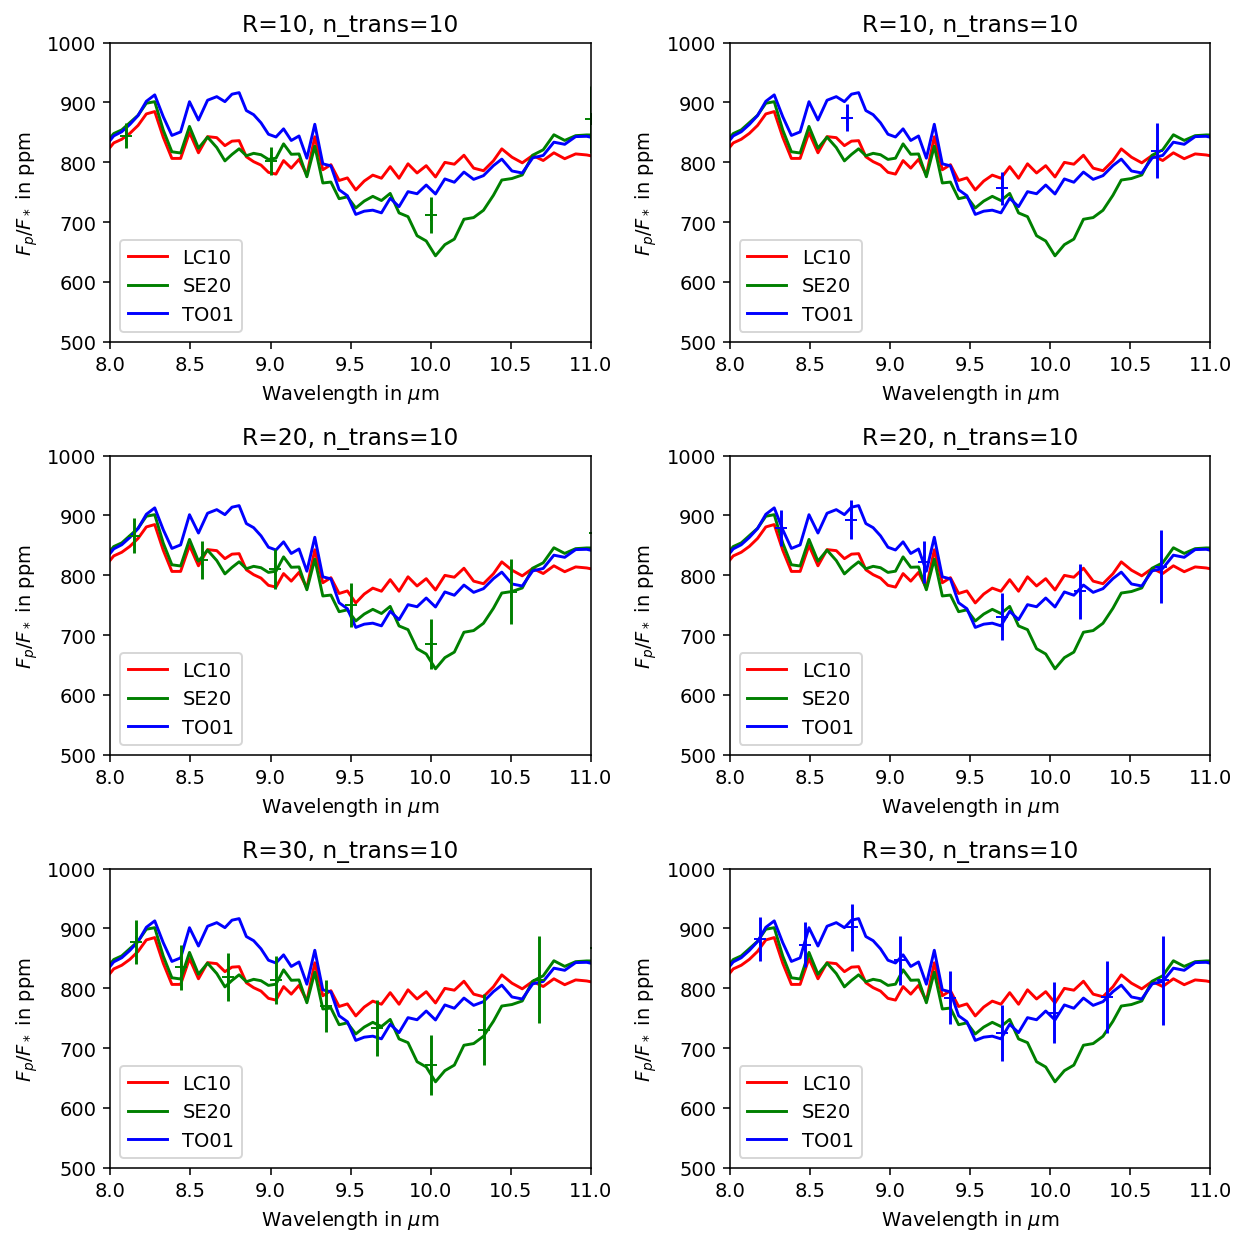

In [8]:
'''
plt.figure()
color_list = ['red', 'green', 'blue']
for i,file in enumerate(file_list):
    plt.plot(wav_model_list[i], 10**6*model_list[i], label=file, color=color_list[i])

plt.errorbar(wav_data_mod_2, 10**6*data_mod_2_list[1], yerr=10**6*err_data_mod_2_list[1], ls='', 
                fmt='+', color=color_list[1])    
plt.legend()
plt.title('R=30, n_trans=5')
plt.xlabel('Wavelength in $\mu$m')
plt.ylabel('$F_p/F_*$ in ppm')
plt.xlim((8,11))
plt.ylim((500,1000))
'''

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,9))

color_list = ['red', 'green', 'blue']

for i,R in enumerate(R_list):
    for j,file in enumerate(file_list):
        ax[i,0].plot(wav_model_list[j], 10**6*model_list[j], label=file, color=color_list[j])

    ax[i,0].errorbar(wav_data_mod_2_se20_list[i], 10**6*data_mod_2_se20_list[i], yerr=10**6*err_data_mod_2_se20_list[i], 
                    ls='', fmt='+', color=color_list[1])    
    ax[i,0].legend()
    ax[i,0].set_title('R=%d, n_trans=10'%R)
    ax[i,0].set_xlabel('Wavelength in $\mu$m')
    ax[i,0].set_ylabel('$F_p/F_*$ in ppm')
    ax[i,0].set_xlim((8,11))
    ax[i,0].set_ylim((500,1000))

for i,R in enumerate(R_list):
    for j,file in enumerate(file_list):
        ax[i,1].plot(wav_model_list[j], 10**6*model_list[j], label=file, color=color_list[j])

    ax[i,1].errorbar(wav_data_mod_2_to01_list[i], 10**6*data_mod_2_to01_list[i], yerr=10**6*err_data_mod_2_to01_list[i], 
                    ls='', fmt='+', color=color_list[2])    
    ax[i,1].legend()
    ax[i,1].set_title('R=%d, n_trans=10'%R)
    ax[i,1].set_xlabel('Wavelength in $\mu$m')
    ax[i,1].set_ylabel('$F_p/F_*$ in ppm')
    ax[i,1].set_xlim((8,11))
    ax[i,1].set_ylim((500,1000))

plt.tight_layout()

### SE20: R=20,30 and n_trans=10

In [11]:
# load data

R = 20

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'SE20_noiseless_data_R' + str(R) +'_ntrans_10.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print("For R=", R)
print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

R = 30

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'SE20_noiseless_data_R' + str(R) +'_ntrans_10.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print("For R=", R)
print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

For R= 20
1.0289764177406386
3.978290345725278e-11
1.07018240188752
For R= 30
0.6323724460127168
4.4526662794748274e-15
0.8413814941660391


### TO01: R=20,30 and n_trans=10

In [12]:
# load data

R = 20

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'TO01_noiseless_data_R' + str(R) +'_ntrans_10.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print("For R=", R)
print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

R = 30

file_prefix = 'simulation_outputs/paper/figure_6/figure_6a/phoenix/'
data = np.loadtxt(file_prefix + 'TO01_noiseless_data_R' + str(R) +'_ntrans_10.txt', delimiter='\t')
wav_data, data, err = data[:,0], data[:,1], data[:,2]

# load models

model_file = np.loadtxt(file_prefix + 'LC10_model.txt')
wav_model_lc10, model_lc10 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'SE20_model.txt')
wav_model_se20, model_se20 = model_file[:,0], model_file[:,1]

model_file = np.loadtxt(file_prefix + 'TO01_model.txt')
wav_model_to01, model_to01 = model_file[:,0], model_file[:,1]

# calculate and print sigma_rejection for the three models

print("For R=", R)
print(frequentist_model_rejection(wav_model_lc10, model_lc10, wav_data, data, err))
print(frequentist_model_rejection(wav_model_se20, model_se20, wav_data, data, err))
print(frequentist_model_rejection(wav_model_to01, model_to01, wav_data, data, err))

For R= 20
1.0584233117898638
1.209886249630265
1.9925681600649852e-13
For R= 30
0.6402442216743112
0.8390912953745431
7.608493505052611e-13
